# Project: Digit Classification with KNN and Naive Bayes

In this project, I implement my own image recognition system for classifying digits.

Inspired from these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [2]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. 
# The data is about 53MB so this cell should take a while the first time it is run.

from sklearn.datasets import fetch_openml
X, Y = fetch_openml('mnist_784', return_X_y=True , cache=False)
Y = Y.astype(int)

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of 
# data points and apply this permutation to X and Y.
# NOTE: Each time we run this cell, We'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print ('data shape: ', X.shape)
print ('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


### (1) Create a 10x10 grid to visualize 10 examples of each digit.

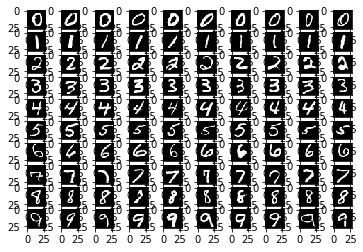

In [3]:
def P1(num_example=10):
    """ This function returns a 10 x 10 grid of the Mnist data
    with the opportunity to change it to less than a 10 by 10 grid.
    """
    
    fig, ax = plt.subplots(num_example,num_example)
    for i in range(num_example):
        for j in range(num_example):
            test = np.reshape(X[np.argwhere(Y == i)[j]], (28,28))
            ax[i][j].imshow(test, cmap='gray')  

P1()

### (2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

In [4]:
def P2(k_values=[1,3,5,7,9]):
    """ This function uses the K nearest neighbors model when
    k = 1, 3, 5, 7, and 9 and shows their classification report results.
    """
    for k in k_values:
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(mini_train_data, mini_train_labels)
        test_predicted_labels = model.predict(dev_data)
        test_true_labels = dev_labels

        print("k=%d: number misclassified ... "  % k ,sum(test_true_labels != test_predicted_labels))
        print(metrics.classification_report(test_true_labels, test_predicted_labels))

P2()        

k=1: number misclassified ...  116
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       106
           1       0.89      0.98      0.93       118
           2       0.90      0.79      0.84       106
           3       0.93      0.87      0.90        97
           4       0.91      0.85      0.88        92
           5       0.86      0.88      0.87        88
           6       0.92      0.92      0.92       102
           7       0.85      0.94      0.89       102
           8       0.83      0.77      0.80        94
           9       0.80      0.86      0.83        95

   micro avg       0.88      0.88      0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.89      0.88      0.88      1000

k=3: number misclassified ...  124
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       106
           1       0.82      0.98      0.90       118
        

ANSWER: Based upon my understanding of F-1 scores, 1 is good and 0 is bad, so 8 having a 0.80 is the worst number or hardest number for k=1. 

### (3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

In [5]:
def P3(train_sizes=[100,200,400,800,1600,3200,6400,12800,25000], accuracies=[]):
    """ This model will train a KNN-1 model when the training size varies.
    It then will report accuracy for the training set size with a time taken
    for each operation.
    """
    for train in train_sizes:
        start = time.time()
        model = KNeighborsClassifier(n_neighbors=1)
        model.fit(train_data[:train], train_labels[:train])
        test_predicted_labels = model.predict(dev_data)
        test_true_labels = dev_labels
        
        # added in submission 2
        accuracies.append(metrics.accuracy_score(test_predicted_labels,test_true_labels))
        
        print("k=%d: number misclassified ... "  % 1 ,sum(test_true_labels != test_predicted_labels))
        print("The accuracy is {}".format(metrics.accuracy_score(test_predicted_labels,test_true_labels)))
        ans = time.time() - start
        print("This training size at {} took {} seconds.".format(train, ans))

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
P3(train_sizes, accuracies)

k=1: number misclassified ...  298
The accuracy is 0.702
This training size at 100 took 0.14150261878967285 seconds.
k=1: number misclassified ...  209
The accuracy is 0.791
This training size at 200 took 0.2796170711517334 seconds.
k=1: number misclassified ...  189
The accuracy is 0.811
This training size at 400 took 0.5943882465362549 seconds.
k=1: number misclassified ...  134
The accuracy is 0.866
This training size at 800 took 1.1899359226226807 seconds.
k=1: number misclassified ...  95
The accuracy is 0.905
This training size at 1600 took 2.355036497116089 seconds.
k=1: number misclassified ...  73
The accuracy is 0.927
This training size at 3200 took 4.840334892272949 seconds.
k=1: number misclassified ...  61
The accuracy is 0.939
This training size at 6400 took 9.790748834609985 seconds.
k=1: number misclassified ...  48
The accuracy is 0.952
This training size at 12800 took 19.79900360107422 seconds.
k=1: number misclassified ...  38
The accuracy is 0.962
This training size

### (4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

In [6]:
def P4():
    """ Transforms data to fit the linear model and removes the 
    logistic regression attempt. Uses train sizes accuracies from P3.
    """
    n = (60000,)
    # applies linear regression to initial model the data set.
    lr_model = LinearRegression()
    lr_model.fit(np.array(train_sizes).reshape(-1, 1), accuracies)
    prediction = lr_model.predict([n])
    print("Training accuracy = {}".format(prediction[0]))

    # Transforming the data through log transformation
    log_sizes = [np.log(train) for train in train_sizes]
    log_accuracies = [np.log(accuracy) for accuracy in accuracies]
    
    # Fitting new model to transformed data
    lr_model2 = LinearRegression()
    lr_model2.fit(np.array(np.log(train_sizes)).reshape(-1, 1), accuracies)
    prediction2 = lr_model2.predict(np.log([n]))
    print("Training accuracy = {}".format(prediction2[0]))
    
P4()

Training accuracy = 1.2446923405015076
Training accuracy = 1.0337099653785087


ANSWER: For n = 60000, it predicts 1.2447 accuracy which is an impossible accuracy since it should be between 0 and 1. Using linear regression might not be the best fit with such a low accuracy, so we transform the data through taking the log of the data which yields a 1.0337 accuracy which is much lower but still unrealistic.

### (5) Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

[[101   0   1   0   0   0   1   1   2   0]
 [  0 116   1   0   0   0   0   0   1   0]
 [  1   4  84   2   2   0   2   4   6   1]
 [  0   2   0  84   0   6   0   2   3   0]
 [  0   0   1   0  78   0   0   2   0  11]
 [  2   0   0   1   1  77   5   0   2   0]
 [  1   2   1   0   1   2  94   0   1   0]
 [  0   1   1   0   0   0   0  96   0   4]
 [  1   5   4   3   1   3   0   1  72   4]
 [  0   1   0   0   3   2   0   7   0  82]]
There were 14 errors where 4 and 9 were confused with each other.
Here are two example images


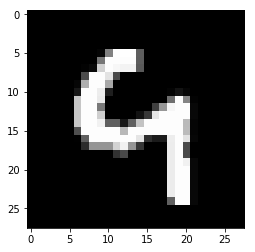

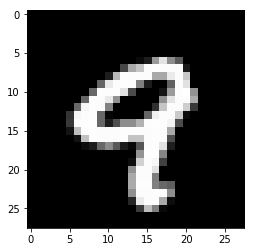

In [7]:
def P5():
    """ This model fits a 1-NN model and then outputs a confusion matrix.
    The confusion matrix shows that 4 and 9 are the most confused pair of digits and 
    shows several example images.
    """
    
    # Model training
    model = KNeighborsClassifier(n_neighbors=1)
    model.fit(mini_train_data, mini_train_labels)
    test_predicted_labels = model.predict(dev_data)
    test_true_labels = dev_labels
    
    # confusion matrix
    print(confusion_matrix(test_true_labels, test_predicted_labels))
    
    # counts the number of errors between 4 and 9
    count = 0
    count2 = 0
    for row in test_true_labels:    
        if row == 4 and test_predicted_labels[count] == 9:
            count2 += 1
            count+=1
        elif row == 9 and test_predicted_labels[count] == 4:
            count2 += 1
            count+=1
        else:
            count+=1
    print("There were {} errors where 4 and 9 were confused with each other.".format(count2))

    # displays example errors.
    print("Here are two example images")
    
    plt.imshow(dev_data[1].reshape([28,28]), cmap='gray')
    plt.show()
    
    plt.imshow(dev_data[3].reshape([28,28]), cmap='gray')
    plt.show()
    
P5()

### (6) Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. We try applying the blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

In [8]:
def P6():
    """ Adjusted blur model so that it transforms the data to a 28 x 28 
    matrix and then reshapes back to the original shape.
    """
    
    def blur(array, weights):
        """This function will blur an array based upon the 8 pixels around it"""
        
        # empty np array
        blurred = np.zeros(array.shape)
        
        # reshape each number to a 28x28 matrix and then adding weighted value
        for i in range(len(array)):
            
            reshape_num = np.reshape(array[i], (28,28))
            blurred_num = np.zeros((28, 28))
            
            # looping specific ranges to index specific parts of the blurred_num matrix
            for j in range(1, 27):
                for k in range(1, 27):
                    for l in range(-1, 2):
                        for m in range(-1, 2):
                            
                            # adding weight to blurred number
                            blurred_num[j][k] += reshape_num[j+l][k+m] * weights[l+1][m+1] 
                            
            # reshaping back to original shape
            blurred[i] = np.reshape(blurred_num, (1, 784))
            
        return blurred       
    
    # weights
    sigma = 1
    weights = np.zeros((3, 3))
    totWeight = 0
    for i in range (-1, 2):
        for j in range (-1, 2):
            # Use 2d gaussian blur formula to assign weight: http://en.wikipedia.org/wiki/Gaussian_blur
            weights[i+1][j+1] = (1/(2 * np.pi * sigma**2))*np.exp(-1 * (i**2 + j**2)/(2 * sigma**2))
            totWeight += weights[i+1][j+1]    
    
    # preprocess the training data
    P6_mini_train_data = mini_train_data.copy()
    P6_mini_train_blur = blur(P6_mini_train_data, weights)
    
    # preprocess the dev_data 
    P6_dev_data = dev_data.copy()
    P6_dev_data_blur = blur(P6_dev_data, weights)
    
    
    # model with preprocess trained data but not dev data
    model = KNeighborsClassifier(n_neighbors=1)
    model.fit(P6_mini_train_blur, mini_train_labels)
    print('Model accuracy for preprocess trained data:', model.score(dev_data, dev_labels))
    
    # model with preprocess dev data but not training data
    model2 = KNeighborsClassifier(n_neighbors=1)
    model2.fit(mini_train_data, mini_train_labels)
    print('Model accuracy for preprocess dev data:', model2.score(P6_dev_data_blur, dev_labels))
    
    # model with preprocess trained and dev data
    model3 = KNeighborsClassifier(n_neighbors=1)
    model3.fit(P6_mini_train_blur, mini_train_labels)
    print('Model accuracy for preprocess trained and dev data:', model3.score(P6_dev_data_blur, dev_labels))

P6()

Model accuracy for preprocess trained data: 0.897
Model accuracy for preprocess dev data: 0.803
Model accuracy for preprocess trained and dev data: 0.901


ANSWER: Blurring the training and the dev data has the best accuracy. It looks like blurring the development data but not the training data led to the worst result which is probably because the training data was expecting more defined numbers rather than the blurred numbers. Training on the blurred numbers also led to a high (close to the combined training/dev blurred numbers) and I think that should make sense since the training data on blurred numbers which is more difficult makes it easier to identify less blurry numbers that are more distinct.

### (7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [9]:
def P7():
    """Fits a naive bayes via bernoulliNB and then tries multinomialNB"""
    
    P7_train_data = np.array(mini_train_data, copy=True)
    P7_train_data[P7_train_data > 0] = 1

    model = BernoulliNB()
    model.fit(P7_train_data, mini_train_labels)
    test_predicted_labels = model.predict(dev_data)
    test_true_labels = dev_labels

    print("The number of errors using BernoulliNB is {}".format(sum(test_true_labels != test_predicted_labels)))
    print("The accuracy is {}".format(metrics.accuracy_score(test_predicted_labels,test_true_labels)))

    # MultinomialNB with 0, 1, or 2 as the training data
    
    P7_train_data2 = np.array(mini_train_data, copy=True)
    P7_train_data2 = np.where((P7_train_data2>0.5), 2, np.where((P7_train_data2<=0.5)&(P7_train_data2!=0), 1, 0))

    model = MultinomialNB()
    model.fit(P7_train_data2, mini_train_labels)
    test_predicted_labels = model.predict(dev_data)
    print("The number of errors using MultinomialNB is {}".format(sum(test_true_labels != test_predicted_labels)))
    print("The accuracy is {}".format(metrics.accuracy_score(test_predicted_labels,test_true_labels)))

P7()

The number of errors using BernoulliNB is 191
The accuracy is 0.809
The number of errors using MultinomialNB is 199
The accuracy is 0.801


ANSWER: The Multi-Class did not improve results when I ran this iteration. I believe that might be because 0 to 1 is much simpler for the Naive Bayes algorithm to understand rather than 0, 1, or 2. The extra feature allowed more opportunities to make mistakes.

### (8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

In [10]:
def P8(alphas={'alpha':[0.0,0.0001,0.001,0.01,0.1,0.5,1.0,2.0,10.0]}):
    """Uses GridSearchCV via alphas (laplace smoothing) to get the best parameters for the
    BernoulliNB model.
    """
    
    # gridsearch for best alpha
    a = GridSearchCV(BernoulliNB(), param_grid=alphas, scoring='neg_mean_squared_error', return_train_score=True)
    a.fit(mini_train_data, mini_train_labels)
    print("The best value for alpha is {}".format(a.best_params_))

    test_predicted_labels = a.predict(dev_data)
    test_true_labels = dev_labels
    print("The number of errors using GridSearchCV for BernoulliNB's best alpha is {}".format(sum(test_true_labels != test_predicted_labels)))
    print("The accuracy is {}".format(metrics.accuracy_score(test_predicted_labels,test_true_labels)))

    
    # Testing BernoulliNB when alpha = 0
    
    model = BernoulliNB(alpha=0)
    model.fit(mini_train_data, mini_train_labels)

    test_predicted_labels = model.predict(dev_data)
    print("The number of errors for BernoulliNB when alpha = 0 is {}".format(sum(test_true_labels != test_predicted_labels)))
    print("The accuracy is {}".format(metrics.accuracy_score(test_predicted_labels,test_true_labels)))

P8()

C:\Users\Theod\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Theod\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\Theod\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\Theod\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


The best value for alpha is {'alpha': 0.001}
The number of errors using GridSearchCV for BernoulliNB's best alpha is 177
The accuracy is 0.823
The number of errors for BernoulliNB when alpha = 0 is 184
The accuracy is 0.816


C:\Users\Theod\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Theod\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


ANSWER: The best values for alpha is 0.001 which beats the value when alpha = 0. It is surprising that the most optimal alpha is extremely close to 0 (indicating no smoothing in the BeroulliNB), but alpha=0 is not the best result. 

### (9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

In [11]:
def P9():
    """Creates a Gaussian model off the training data. Then examines
    the sigma values. Based upon that, I decided to smooth the data
    by 2e-2 which yields approximately a 0.8 accuracy which is 
    comparable to my bernoulliNB model.
    """
    # Original gaussianNB model.
    classifier = GaussianNB()
    model = classifier.fit(mini_train_data,mini_train_labels)
    test_predicted_labels = model.predict(dev_data)
    test_true_labels = dev_labels

    print("Number of mislabeled points out of a total 1000 points : {}".format(sum(test_true_labels != test_predicted_labels)))
    print("The accuracy is {}".format(metrics.accuracy_score(test_predicted_labels,test_true_labels)))

    print(model.sigma_)

    # smoothing the model based off the sigma values.
    print("Now with model smoothing in reaction to the sigma values")
    classifier = GaussianNB(var_smoothing=2e-2)
    model = classifier.fit(mini_train_data,mini_train_labels)
    test_predicted_labels = model.predict(dev_data)
    test_true_labels = dev_labels

    print("Number of mislabeled points out of a total 1000 points : {}".format(sum(test_true_labels != test_predicted_labels)))
    print("The accuracy is {}".format(metrics.accuracy_score(test_predicted_labels,test_true_labels)))

P9()

Number of mislabeled points out of a total 1000 points : 407
The accuracy is 0.593
[[2.01433307e-10 2.01433307e-10 2.01433307e-10 ... 2.01433307e-10
  2.01433307e-10 2.01433307e-10]
 [2.01433307e-10 2.01433307e-10 2.01433307e-10 ... 2.01433307e-10
  2.01433307e-10 2.01433307e-10]
 [2.01433307e-10 2.01433307e-10 2.01433307e-10 ... 2.01433307e-10
  2.01433307e-10 2.01433307e-10]
 ...
 [2.01433307e-10 2.01433307e-10 2.01433307e-10 ... 2.01433307e-10
  2.01433307e-10 2.01433307e-10]
 [2.01433307e-10 2.01433307e-10 2.01433307e-10 ... 2.01433307e-10
  2.01433307e-10 2.01433307e-10]
 [2.01433307e-10 2.01433307e-10 2.01433307e-10 ... 2.01433307e-10
  2.01433307e-10 2.01433307e-10]]
Now with model smoothing in reaction to the sigma values
Number of mislabeled points out of a total 1000 points : 189
The accuracy is 0.811


ANSWER: I noticed that the sigma values were all 2e-10 which appeared to be very small and may be overconfident in pixel estimates. Since they were so close to 0, I decided to apply a smoothing by 2e-2 through the var_smoothing parameter in order to add variance for calculation stability. Through this adjustment, the model represented about a 0.8 accuracy which is closer to my BernoulliNB accuracy.

### (10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

This is a 10x20 grid with generated digits


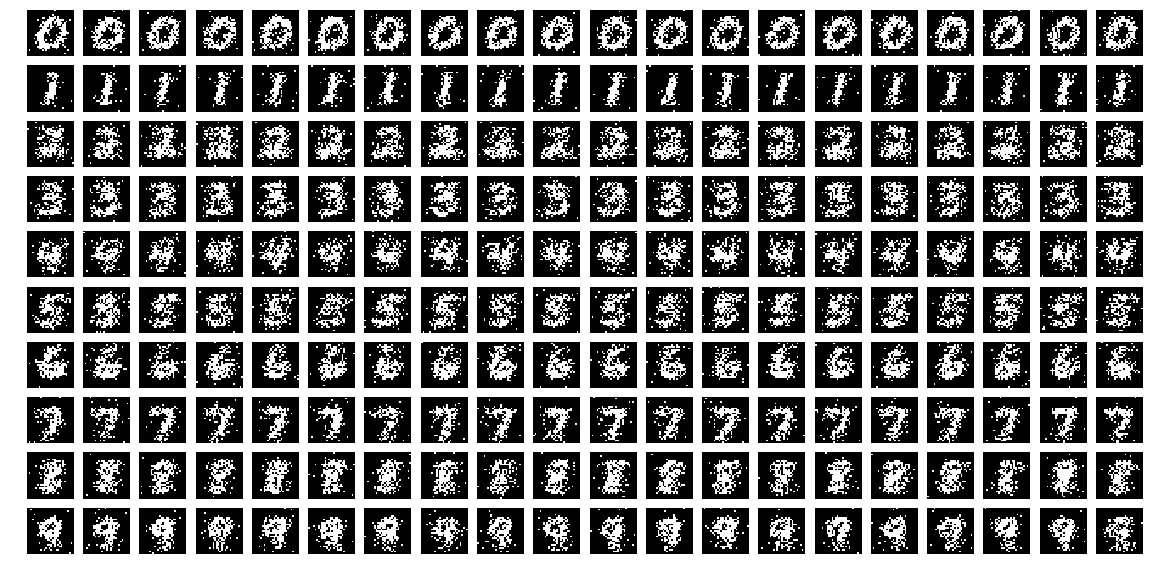

In [12]:
def P10(num_examples=20):
    """ Trained a 10 x 20 grid with 20 examples of each digit with BernoulliNB outputting
    each pixel as a 0 or a 1.
    """
    
    # model to generate a number
    def gen_num(prob):
        "Generates a random figure with a given probability"
        rand = np.random.rand(784)
        rand[rand <= prob] = 1
        rand[rand != 1] = 0
        return rand
    
    # train the model
    classifier = BernoulliNB()
    model = classifier.fit(mini_train_data, mini_train_labels)
    prob = np.exp(model.feature_log_prob_)
    
    # develop 10 x 20 grid with bernoulli model on dev_data.
    
    print("This is a 10x20 grid with generated digits")
    
    # Adjusted for generated model now to get value of each pixel
    fig = plt.figure(figsize=(num_examples,num_examples-10))
    for i in range(num_examples-10):
        for j in range(num_examples):
            number = np.array(gen_num(prob[i])).reshape(28,28)
            ax2 = fig.add_subplot(num_examples-10, num_examples, i*num_examples+j+1, aspect='equal')
            ax2.set_axis_off()
            ax2.imshow(number, cmap='gray')
                 
P10(20)

ANSWER: Generated digits are more blurry than the training data. 2, 3, 4, 5, 6, 8, and 9 happen to be so blurry due to the curves that they can be mistaken as a different number.

### (11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [13]:
def P11(buckets, correct, total):
    """This model will train a BernoulliNB and see which buckets go where with posterior
    probability.
    """
    
    # model trained
    classifier = BernoulliNB(alpha=.1, binarize=0.5)
    model = classifier.fit(mini_train_data,mini_train_labels)
    
    # assigns max probability for each digit to a bucket
    max_pprob = np.amax(model.predict_proba(dev_data), axis=1)
    bucket_digitize = np.digitize(max_pprob, buckets)
    
    # Adjust bins to start at 0.
    for i in bucket_digitize:
        try:
            total[i] += 1
        except:
            total[-1] += 1
    else:
        None
    
    # finds out what digits were predicted, if it matched the labels and measures
    # how many were correct.
    max_pprob_num = np.argmax(model.predict_proba(dev_data), axis=1)
    predict_check = max_pprob_num == dev_labels
    correct_pprobs = predict_check * max_pprob
    
    # adjusts this to match the bucket_digitize
    correct_digitize = np.digitize(correct_pprobs, buckets)
    for i in correct_digitize:
        try:
            correct[i] += 1
        except:
            correct[-1] += 1
    else:
        None
        

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print('p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy))

p(pred) <= 0.5000000000000    total =   0    accuracy = 0.000
p(pred) <= 0.9000000000000    total =  45    accuracy = 0.311
p(pred) <= 0.9990000000000    total =  90    accuracy = 0.522
p(pred) <= 0.9999900000000    total =  77    accuracy = 0.506
p(pred) <= 0.9999999000000    total =  65    accuracy = 0.754
p(pred) <= 0.9999999990000    total =  62    accuracy = 0.919
p(pred) <= 0.9999999999900    total =  75    accuracy = 0.867
p(pred) <= 0.9999999999999    total =  72    accuracy = 0.903
p(pred) <= 1.0000000000000    total = 514    accuracy = 0.957


ANSWER: The NB model goes to zero or one exponentially because the independence assumption allows estimates to grow quickly. It works extremely well, but the assumption is the key for evaluating it's utility.